In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings (optional for better viewing)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


In [13]:
# Load CSV files
df1 = pd.read_csv('coin_gecko_2022-03-16.csv')
df2 = pd.read_csv('coin_gecko_2022-03-17.csv')

# Combine the datasets
df = pd.concat([df1, df2], ignore_index=True)

# Show first 5 rows
df.head()


,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [14]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          993 non-null    float64
 4   24h         993 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  993 non-null    float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64

In [15]:
df.dropna(inplace=True)


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Convert to numeric just in case
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['24h_volume'] = pd.to_numeric(df['24h_volume'], errors='coerce')

# Drop rows with NaNs in price or volume
df.dropna(subset=['price', '24h_volume'], inplace=True)

# Normalize (scale) price and 24h_volume
scaler = MinMaxScaler()
df[['price', '24h_volume']] = scaler.fit_transform(df[['price', '24h_volume']])


In [25]:
# For cleaner plots
sns.set(style="whitegrid")
# Descriptive statistics
df.describe()


,price,1h,24h,7d,24h_volume,mkt_cap
count,992.000000,992.000000,992.000000,992.000000,992.000000,9.920000e+02
mean,0.015044,0.009682,0.024018,0.023558,0.004979,3.783951e+09
std,0.107285,0.026917,0.058668,0.229781,0.047833,3.818970e+10
min,0.000000,-0.704000,-0.646000,-0.558000,0.000000,6.577043e+07
25%,0.000005,0.001000,0.001000,-0.041000,0.000030,1.158501e+08
50%,0.000027,0.006000,0.016000,-0.000500,0.000144,2.131953e+08
75%,0.000169,0.019000,0.035000,0.037000,0.000681,5.972493e+08
max,1.000000,0.095000,0.577000,4.608000,1.000000,7.760774e+11


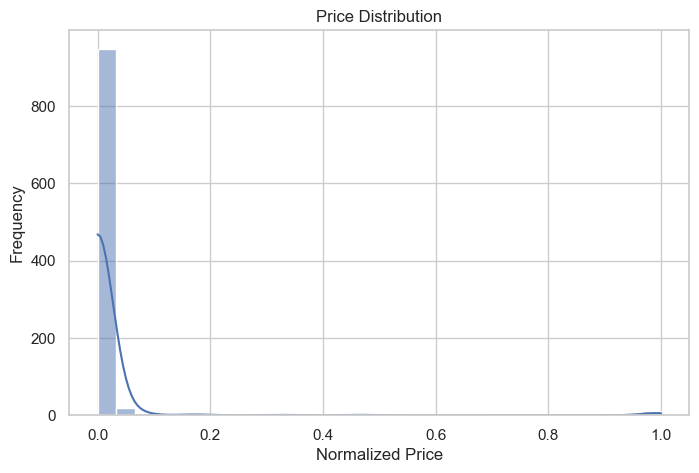

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.show()


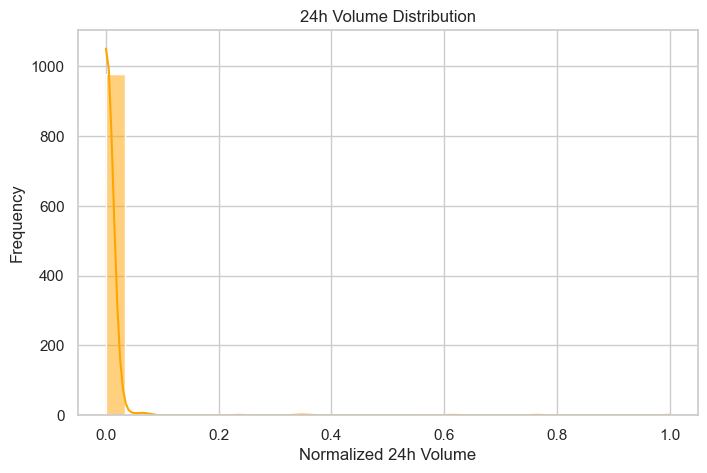

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(df['24h_volume'], bins=30, kde=True, color='orange')
plt.title('24h Volume Distribution')
plt.xlabel('Normalized 24h Volume')
plt.ylabel('Frequency')
plt.show()


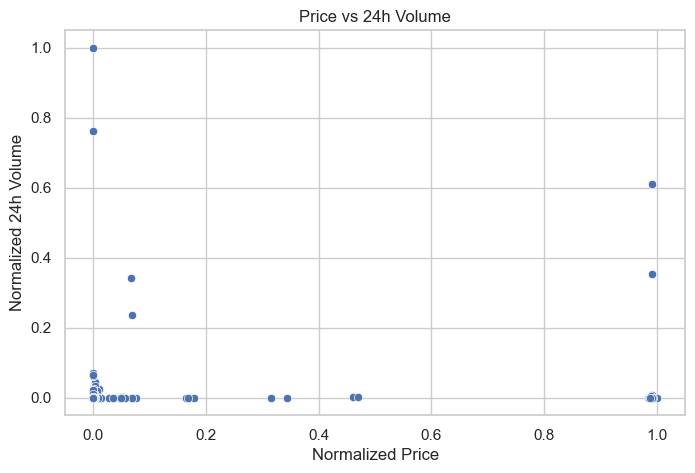

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='price', y='24h_volume')
plt.title('Price vs 24h Volume')
plt.xlabel('Normalized Price')
plt.ylabel('Normalized 24h Volume')
plt.show()


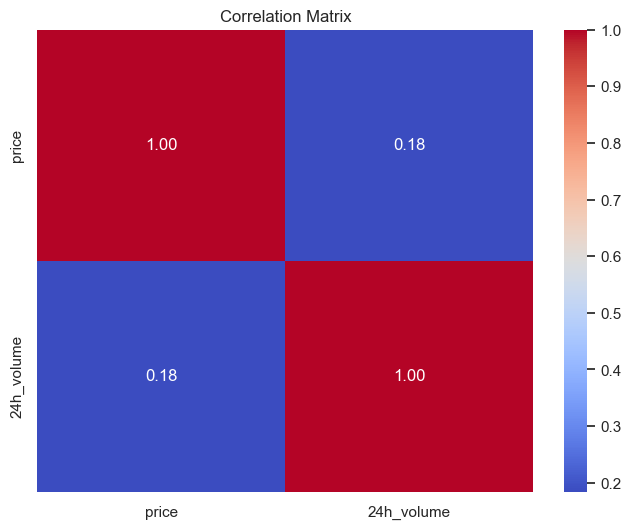

In [29]:
plt.figure(figsize=(8, 6))
corr = df[['price', '24h_volume']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


C:\Users\anilp\AppData\Local\Temp\ipykernel_9840\533744597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_coins, x='coin', y='mkt_cap', palette='viridis')


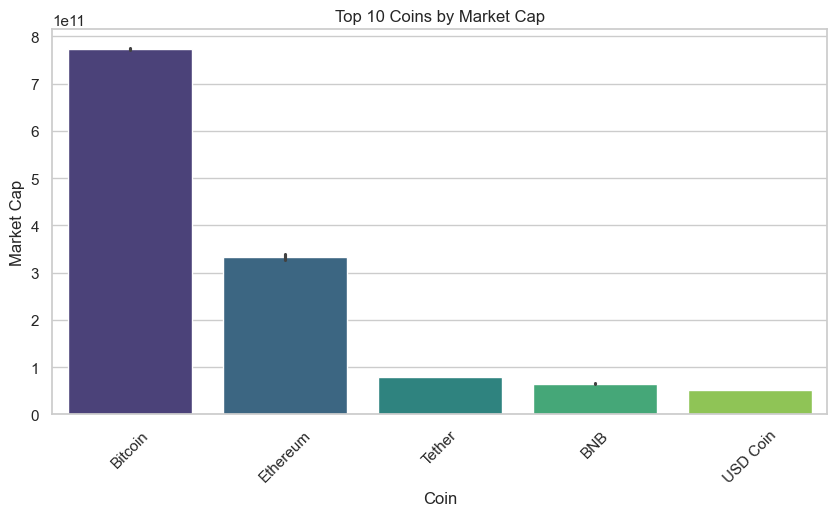

In [30]:
top_coins = df.sort_values('mkt_cap', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_coins, x='coin', y='mkt_cap', palette='viridis')
plt.title('Top 10 Coins by Market Cap')
plt.xlabel('Coin')
plt.ylabel('Market Cap')
plt.xticks(rotation=45)
plt.show()


In [31]:
# Save the cleaned DataFrame to a CSV file
df.to_csv("cleaned_crypto_data.csv", index=False)
